In [815]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras import regularizers

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier


import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

%matplotlib inline

In [863]:
df = pd.read_csv("df_newest.csv")
df.columns

df = df[[x not in [2,10,11,12,13,14] for x in df['target_vermin']]]

In [864]:
feature_list = [] # Create a list of A1 - K18
    
for x in range(0,198):
    num = x % 18 + 1
    alph = chr(x // 18 + 65)
    feature_list.append(f"{alph}{num}")

In [865]:
feature_list.append('problem_max_mov')
feature_list.append('problem_avg_mov')
feature_list.append('steepness_dummy')
feature_list.append('holds')
feature_list.append('num_holds_under_start')
#feature_list.append('Screw ons only')
#feature_list.append('Feet follow hands + screw ons')
feature_list.append('Footless + kickboard')
#feature_list.append("num_start_holds")

#feature_list.append('start_dist')
#feature_list.append('end_dist')
#feature_list.append('two_nearest_avg')
#feature_list.append('two_nearest_max')
#feature_list.append('three_nearest_avg')
#feature_list.append('three_nearest_max')
feature_list.append('ball_point_275')

In [866]:
X = df[feature_list]
y = df['target_vermin']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=66)

In [855]:
# ss= StandardScaler()
# X_train = ss.fit_transform(X_train)
# X_test = ss.transform(X_test)

In [867]:
model = Sequential()

model.add(Dense(207, activation='relu', input_dim = X_train.shape[1])) #12
model.add(Dense(20, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(207, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dense(20, activation = 'relu'))
#model.add(Dense(207, activation = 'relu'))



model.add(Dense(1, activation=None)) # output layer

In [868]:
model.compile(loss='mean_squared_error', optimizer='adam') 
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=200, verbose=0, mode='auto')

In [869]:
%time
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=2000, batch_size=2048,
                    callbacks= [early_stop])

Wall time: 0 ns
Train on 5926 samples, validate on 2919 samples
Epoch 1/2000
5926/5926 [==============================] - 2s 293us/step - loss: 46.6391 - val_loss: 25.5036
Epoch 2/2000
5926/5926 [==============================] - 0s 10us/step - loss: 23.9960 - val_loss: 9.3030
Epoch 3/2000
5926/5926 [==============================] - 0s 11us/step - loss: 5.7183 - val_loss: 5.6764
Epoch 4/2000
5926/5926 [==============================] - 0s 12us/step - loss: 7.9203 - val_loss: 8.6480
Epoch 5/2000
5926/5926 [==============================] - 0s 11us/step - loss: 7.5750 - val_loss: 4.0058
Epoch 6/2000
5926/5926 [==============================] - 0s 11us/step - loss: 3.7228 - val_loss: 3.9678
Epoch 7/2000
5926/5926 [==============================] - 0s 11us/step - loss: 4.5233 - val_loss: 5.3430
Epoch 8/2000
5926/5926 [==============================] - 0s 12us/step - loss: 4.8451 - val_loss: 3.8386
Epoch 9/2000
5926/5926 [==============================] - 0s 11us/step - loss: 3.4820 - val_

5926/5926 [==============================] - 0s 10us/step - loss: 1.9110 - val_loss: 1.8918
Epoch 78/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.9093 - val_loss: 1.8599
Epoch 79/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.9015 - val_loss: 1.8557
Epoch 80/2000
5926/5926 [==============================] - 0s 13us/step - loss: 1.8957 - val_loss: 1.8370
Epoch 81/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.8895 - val_loss: 1.8337
Epoch 82/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.8855 - val_loss: 1.8415
Epoch 83/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.8803 - val_loss: 1.8319
Epoch 84/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.8816 - val_loss: 1.8249
Epoch 85/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.8732 - val_loss: 1.8279
Epoch 86/2000
5926/5926 [==============================] - 0

Epoch 154/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.7612 - val_loss: 1.7370
Epoch 155/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.7661 - val_loss: 1.7745
Epoch 156/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.7653 - val_loss: 1.7664
Epoch 157/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.7463 - val_loss: 1.7297
Epoch 158/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.7317 - val_loss: 1.7374
Epoch 159/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.7360 - val_loss: 1.7444
Epoch 160/2000
5926/5926 [==============================] - 0s 12us/step - loss: 1.7328 - val_loss: 1.7240
Epoch 161/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.7294 - val_loss: 1.7314
Epoch 162/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.7222 - val_loss: 1.7298
Epoch 163/2000
5926/5926 [===========

5926/5926 [==============================] - 0s 12us/step - loss: 1.6378 - val_loss: 1.6796
Epoch 231/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.6251 - val_loss: 1.6830
Epoch 232/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.6311 - val_loss: 1.7265
Epoch 233/2000
5926/5926 [==============================] - 0s 13us/step - loss: 1.6421 - val_loss: 1.6990
Epoch 234/2000
5926/5926 [==============================] - 0s 13us/step - loss: 1.6269 - val_loss: 1.6545
Epoch 235/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.6054 - val_loss: 1.6563
Epoch 236/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.6069 - val_loss: 1.6529
Epoch 237/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.5996 - val_loss: 1.6613
Epoch 238/2000
5926/5926 [==============================] - 0s 12us/step - loss: 1.6261 - val_loss: 1.6553
Epoch 239/2000
5926/5926 [==========================

5926/5926 [==============================] - 0s 11us/step - loss: 1.4957 - val_loss: 1.6212
Epoch 307/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.5060 - val_loss: 1.5958
Epoch 308/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.4957 - val_loss: 1.6110
Epoch 309/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.4913 - val_loss: 1.6537
Epoch 310/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.5327 - val_loss: 1.8029
Epoch 311/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.7499 - val_loss: 1.5951
Epoch 312/2000
5926/5926 [==============================] - 0s 12us/step - loss: 1.6496 - val_loss: 1.6480
Epoch 313/2000
5926/5926 [==============================] - 0s 12us/step - loss: 1.5937 - val_loss: 1.7201
Epoch 314/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.5761 - val_loss: 1.7248
Epoch 315/2000
5926/5926 [==========================

5926/5926 [==============================] - 0s 11us/step - loss: 1.4168 - val_loss: 1.6322
Epoch 383/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.4614 - val_loss: 1.7221
Epoch 384/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.5674 - val_loss: 1.5184
Epoch 385/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.4042 - val_loss: 1.5245
Epoch 386/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.4305 - val_loss: 1.5908
Epoch 387/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.4424 - val_loss: 1.6134
Epoch 388/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.3947 - val_loss: 1.5820
Epoch 389/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.3732 - val_loss: 1.5760
Epoch 390/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.4114 - val_loss: 1.5770
Epoch 391/2000
5926/5926 [==========================

5926/5926 [==============================] - 0s 10us/step - loss: 1.3622 - val_loss: 1.8092
Epoch 459/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.4436 - val_loss: 1.6603
Epoch 460/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.4881 - val_loss: 1.5178
Epoch 461/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.3099 - val_loss: 1.6559
Epoch 462/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.3746 - val_loss: 1.5125
Epoch 463/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.3349 - val_loss: 1.5085
Epoch 464/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.3145 - val_loss: 1.5855
Epoch 465/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.2822 - val_loss: 1.5765
Epoch 466/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.2922 - val_loss: 1.5281
Epoch 467/2000
5926/5926 [==========================

5926/5926 [==============================] - 0s 10us/step - loss: 1.2678 - val_loss: 1.6451
Epoch 535/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.2570 - val_loss: 1.6773
Epoch 536/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.2864 - val_loss: 1.6214
Epoch 537/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.2662 - val_loss: 1.5168
Epoch 538/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.2053 - val_loss: 1.5216
Epoch 539/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.2109 - val_loss: 1.5487
Epoch 540/2000
5926/5926 [==============================] - 0s 12us/step - loss: 1.2060 - val_loss: 1.6033
Epoch 541/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.2121 - val_loss: 1.5504
Epoch 542/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.2112 - val_loss: 1.5123
Epoch 543/2000
5926/5926 [==========================

5926/5926 [==============================] - 0s 10us/step - loss: 1.1897 - val_loss: 1.5845
Epoch 611/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.1793 - val_loss: 1.6751
Epoch 612/2000
5926/5926 [==============================] - 0s 11us/step - loss: 1.2084 - val_loss: 1.6195
Epoch 613/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.1658 - val_loss: 1.5522
Epoch 614/2000
5926/5926 [==============================] - 0s 9us/step - loss: 1.1933 - val_loss: 1.6383
Epoch 615/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.2353 - val_loss: 1.5584
Epoch 616/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.2373 - val_loss: 1.5348
Epoch 617/2000
5926/5926 [==============================] - 0s 9us/step - loss: 1.2705 - val_loss: 1.5480
Epoch 618/2000
5926/5926 [==============================] - 0s 10us/step - loss: 1.2645 - val_loss: 1.6308
Epoch 619/2000
5926/5926 [============================

In [860]:
prediction = pd.DataFrame(y_test)
prediction.columns = ['y_test']

prediction.reset_index(inplace=True)

prediction['NN'] = model.predict(X_test)

count = 0
accurate = 0
floor = 0
for index in range(len(prediction)):
    count += abs(prediction['y_test'][index] - prediction['NN'][index])
    if prediction['y_test'][index] == prediction['NN'][index].round():
        accurate +=1
    if prediction['y_test'][index] == np.floor(prediction['NN'][index]):
        floor +=1
        
print(f"error per problem = {count/len(prediction)}")
print(f"accuracy of round = {accurate/len(prediction)}")
print(f"accuracy of floor = {floor/len(prediction)}")

error per problem = 1.000134701514824
accuracy of round = 0.3261390887290168
accuracy of floor = 0.3114080164439877


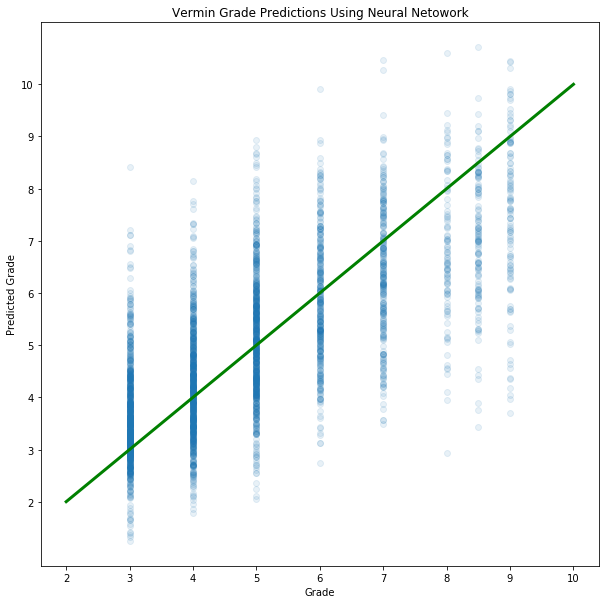

In [861]:
plt.figure(figsize=(10,10))
plt.scatter(prediction['y_test'], prediction["NN"], alpha=0.1)
plt.xlabel("Grade")
plt.ylabel("Predicted Grade")
plt.xticks(range(2,11))
plt.yticks(range(2,11))
plt.title("Vermin Grade Predictions Using Neural Netowork")
plt.savefig("Preds_vs_setter_7-13")
plt.plot([2,10],[2,10], color='g', linestyle='-', linewidth=3);
plt.savefig("Images/NueralNetwork")

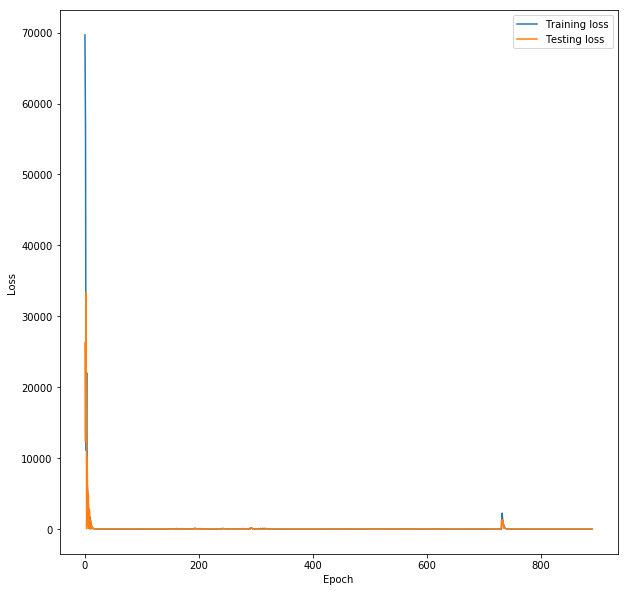

In [835]:
plt.figure(figsize=(10,10))
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("Images/history")

In [619]:
prediction.sort_values("NN", ascending=False)

,y_test,NN
1871,9.0,10.543546
402,8.5,10.496305
1763,8.0,10.458590
1857,9.0,10.392934
2523,8.5,10.231595
2096,9.0,10.187172
872,9.0,10.106318
2692,9.0,9.808341
2346,9.0,9.787355
2696,7.0,9.735049


# Linear Regression

In [871]:
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Lasso, LassoCV

In [872]:
lr = Ridge(alpha=0.8)
ss= StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
lr.fit(X_train,y_train)

Ridge(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [873]:
cross_val_score(lr, X_test, y_test, cv = 5, scoring = 'r2')

array([0.48445372, 0.53658315, 0.52903964, 0.48212805, 0.55525157])

In [874]:
prediction['LinReg'] = lr.predict(X_test)

count = 0
accurate = 0
floor = 0
for index in range(len(prediction)):
    count += abs(prediction['y_test'][index] - prediction['LinReg'][index])
    if prediction['y_test'][index] == prediction['LinReg'][index].round():
        accurate +=1
    if prediction['y_test'][index] == np.floor(prediction['LinReg'][index]):
        floor +=1
        
print(f"error per problem = {count/len(prediction)}")
print(f"accuracy of round = {accurate/len(prediction)}")
print (f"accuracy of floor = {floor/len(prediction)}")

error per problem = 0.938569512847566
accuracy of round = 0.32716683795820484
accuracy of floor = 0.3545734840698869


In [875]:
lr.predict(X_test)

array([3.9854186 , 5.54335362, 5.50508349, ..., 5.18842232, 6.83413078,
       5.71579576])

In [876]:
pd.DataFrame(lr.coef_, index=X.columns).sort_values(0, ascending=False)

,0
steepness_dummy,0.386426
problem_avg_mov,0.231557
K18,0.142667
problem_max_mov,0.130088
A18,0.112527
I12,0.089762
F16,0.089212
H11,0.086200
C12,0.085477
B11,0.083337


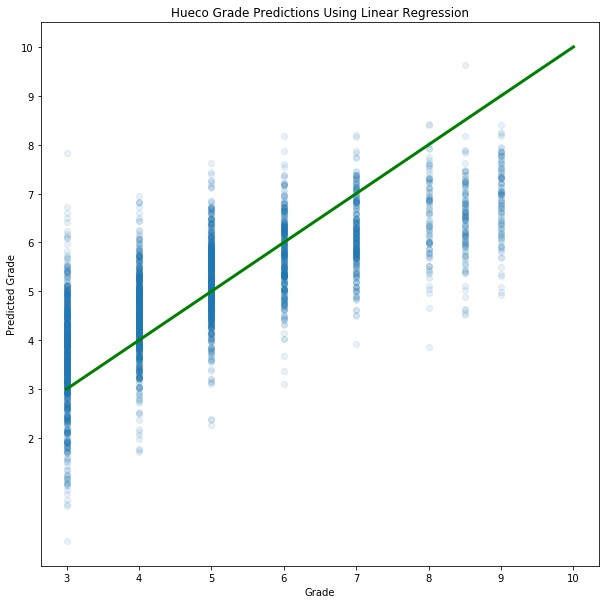

In [877]:
plt.figure(figsize=(10,10))
plt.scatter(prediction['y_test'], lr.predict(X_test), alpha=0.1)
plt.xlabel("Grade")
plt.ylabel("Predicted Grade")
plt.xticks(range(2,15))
plt.yticks(range(2,13))
plt.title("Hueco Grade Predictions Using Linear Regression")
plt.savefig("Preds_vs_setter_7-13")
plt.plot([3,10],[3,10], color='g', linestyle='-', linewidth=3);
plt.savefig("Images/LinReg")

# Gradient Boost

In [823]:
gb = GradientBoostingRegressor()

gb_params = {
    'max_depth': [5,6],
    'n_estimators': [150],
    'max_features': ['auto', None],
    'loss': ['lad','huber']
}
gs_gb = GridSearchCV(gb, param_grid=gb_params, verbose = 1, n_jobs=-1)

print(gs_gb.fit(X_train, y_train))
print(f"test score: {gs_gb.score(X_test,y_test)}")
print(gs_gb.best_score_)
print(gs_gb.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:  1.3min remaining:  6.3min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [5, 6], 'n_estimators': [150], 'max_features': ['auto', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)
test score: 0.3936279547790339
0.38272021599730005
{'max_depth': 6, 'max_features': None, 'n_estimators': 150}


In [758]:
prediction['Grad_boost'] = gs_gb.predict(X_test)

count = 0
accurate = 0
floor = 0
for index in range(len(prediction)):
    count += abs(prediction['y_test'][index] - prediction['Grad_boost'][index])
    if prediction['y_test'][index] == prediction['Grad_boost'][index].round():
        accurate +=1
    if prediction['y_test'][index] == np.floor(prediction['Grad_boost'][index]):
        floor +=1
        
print(f"error per problem = {count/len(prediction)}")
print(f"accuracy of round = {accurate/len(prediction)}")
print (f"accuracy of floor = {floor/len(prediction)}")

error per problem = 0.848216429511587
accuracy of round = 0.394655704008222
accuracy of floor = 0.37341555327166837


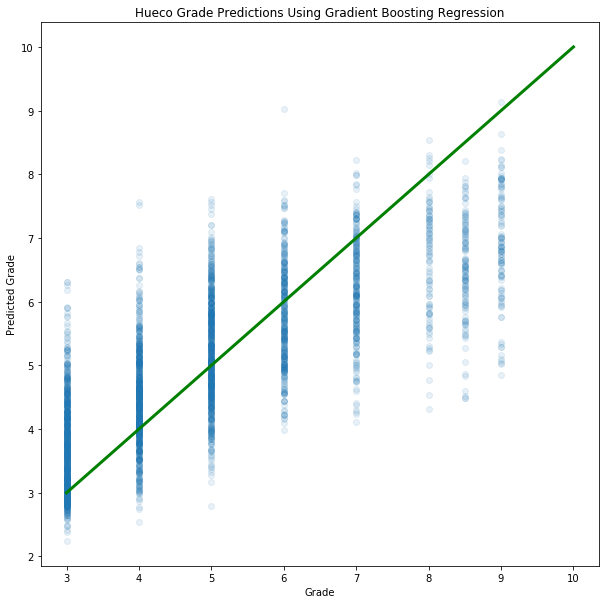

In [755]:
plt.figure(figsize=(10,10))
plt.scatter(prediction['y_test'], gs_gb.predict(X_test), alpha=0.1)
plt.xlabel("Grade")
plt.ylabel("Predicted Grade")
plt.xticks(range(2,15))
plt.yticks(range(2,13))
plt.title("Hueco Grade Predictions Using Gradient Boosting Regression")
plt.savefig("Preds_vs_setter_7-13")
plt.plot([3,10],[3,10], color='g', linestyle='-', linewidth=3);
plt.savefig("Images/GradBoost")

In [630]:
prediction.sort_values('y_test', ascending=False)

,y_test,NN,LinReg,Grad_boost
816,9.0,9.573331,7.632573,8.009854
1278,9.0,7.555741,6.634300,6.165871
1201,9.0,7.241086,7.192777,6.632396
1208,9.0,7.331613,5.700451,6.298226
192,9.0,7.680953,6.678941,7.264260
2444,9.0,6.177827,5.917470,5.571087
198,9.0,7.594731,7.328027,6.875499
1246,9.0,8.654278,7.939095,8.895143
2404,9.0,7.291608,6.304998,6.306766
2395,9.0,7.570345,7.000630,7.205247


In [631]:
prediction["aggregate?"]=(prediction['NN'] + prediction['LinReg'] + prediction['Grad_boost'])/3

In [632]:
count = 0
accurate = 0
floor = 0
for index in range(len(prediction)):
    count += abs(prediction['y_test'][index] - prediction["aggregate?"][index])
    if prediction['y_test'][index] == prediction["aggregate?"][index].round():
        accurate +=1
    if prediction['y_test'][index] == np.floor(prediction["aggregate?"][index]):
        floor +=1
        
print(f"error per problem = {count/len(prediction)}")
print(f"accuracy of round = {accurate/len(prediction)}")
print (f"accuracy of floor = {floor/len(prediction)}")

error per problem = 0.8486110939759396
accuracy of round = 0.3747858855772525
accuracy of floor = 0.394655704008222


In [633]:
df['target_vermin'].value_counts()

3.0    2046
4.0    2019
5.0    1804
6.0    1143
7.0     778
8.5     432
9.0     322
8.0     301
Name: target_vermin, dtype: int64

In [878]:
#looking at biggest difference in problems
prediction["NN_DIFF"] = abs(prediction['y_test'] - prediction['NN'])

bad_hombres = list(prediction.sort_values('NN_DIFF', ascending=False).head(10)['index'])


prediction.sort_values('NN_DIFF', ascending=False).head(10)

,index,y_test,NN,LinReg,NN_DIFF
2253,1640,3.0,8.410252,6.131617,5.410252
2497,4934,9.0,3.699461,5.886214,5.300539
1648,1912,8.5,3.437690,4.643747,5.062310
2088,5079,8.0,2.939537,4.968651,5.060463
1760,7550,9.0,3.959495,4.987620,5.040505
440,9110,9.0,4.047200,6.237578,4.952800
2699,8203,9.0,4.179068,5.346298,4.820932
474,4992,8.5,3.764928,4.557742,4.735072
1037,8619,9.0,4.348745,7.037745,4.651255
85,6125,9.0,4.376723,5.315401,4.623277


In [724]:
for x in bad_hombres:
    print(x)
    print(df['problem_name'][x])

6648
TRAINING ALL FEET 5
1912
THE OCTAGON
8787
SURE
8203
RATED R
2198
WITHOUT A PADDLE
7550
UH
4771
WASACHULI
7053
KAHOOT
6125
TEST 15
758
PROBLEM


In [712]:
df[df['problem_name']=='RATED R']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,prob_id,prob_id.1,prob_id.2,Unnamed: 0.1.1.1,prob_id.3,prob_id.1.1,problem_name,setter_grade,user_grade,date,method,rating,user_rating,repeats,steepness,setter,city,country,setup,start,end,moves,holds,start_coords,end_coords,move_coords,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15,B16,B17,B18,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,E18,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12,H13,H14,H15,H16,H17,H18,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,I17,I18,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10,J11,J12,J13,J14,J15,J16,J17,J18,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11,K12,K13,K14,K15,K16,K17,K18,problem_avg_mov,problem_max_mov,target,target_vermin,steepness_dummy,Feet follow hands + screw ons,Footless + kickboard,Screw ons only,Feet follow hands + screw ons.1,Footless + kickboard.1,Screw ons only.1,problem_min_dist,Feet follow hands + screw ons.2,Footless + kickboard.2,Screw ons only.2,num_holds_under_start,num_start_holds,start_dist,end_dist,two_nearest_avg,two_nearest_max,three_nearest_avg,three_nearest_max,ball_point_275
8203,8203,8203,8203,8203,8203,8203,8203,8203,320895,RATED R,7C,NaN,09 Jun 2018 04:05,Feet follow hands,0,3,1,40° MoonBoard,Austin hoyt,Tappan,NEW YORK,MoonBoard Masters 2017,['H5'],['F18'],"['H13', 'I16', 'I10', 'F8']",6,"[[445, 736]]","[[345, 86]]","[[345, 586], [445, 336], [495, 488], [495, 188]]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,198.567953,212.5,16,9.0,1,0,0,0,0,0,0,"[(345, 732.5), 212.5, (495, 610.0), 193.665304...",0,0,0,0,1.0,212.5,196.866071,38645.214801,41153.877115,1.298798e+07,1.414761e+07,2.0
